In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("data/mammals.csv", sep=',')
df

,id,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5
...,...,...,...
57,Brazilian tapir,160.000,169.0
58,Tenrec,0.900,2.6
59,Phalanger,1.620,11.4
60,Tree shrew,0.104,2.5


In [3]:
body = df['body'].values
brain = df['brain'].values
names = df['id'].values

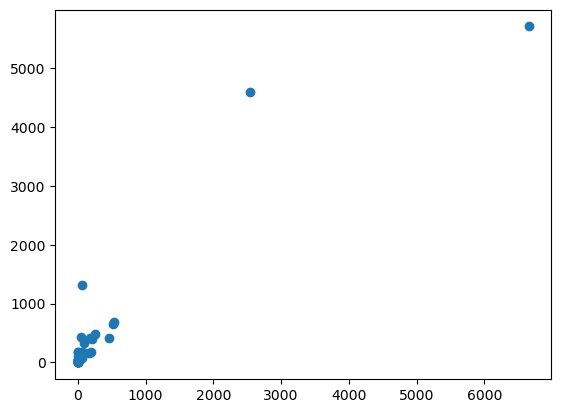

In [4]:
plt.scatter(body, brain)
plt.show()

In [5]:
X = body_log = np.log(body)
Y = brain_log = np.log(brain)

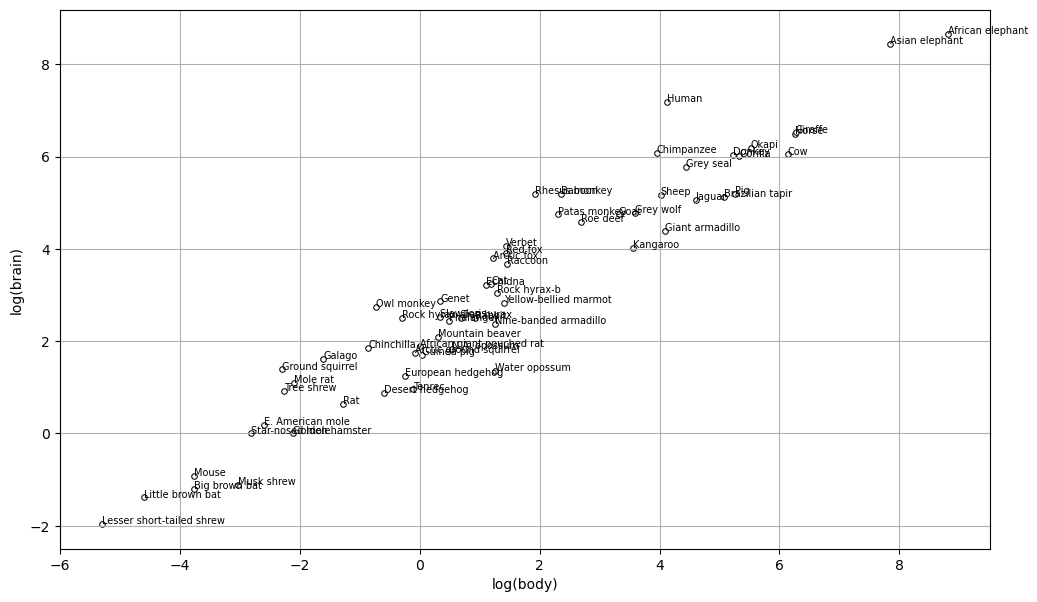

In [6]:
plt.figure(figsize=(12,7))
plt.scatter(body_log, brain_log, s=16, c='w', edgecolors='k', linewidth=0.75)
plt.xlabel('log(body)')
plt.ylabel('log(brain)')

for name, x, y in zip(names, body_log, brain_log):
    plt.text(x, y, name, fontsize=7)

plt.grid(1)
plt.show()

In [7]:
from mltools.estimators import LinearLS

In [8]:
regr_ls = LinearLS()
regr_ls.fit(X[:,None], Y)
mod_ls = regr_ls.model
print(mod_ls.param)

[2.13478868 0.75168594]


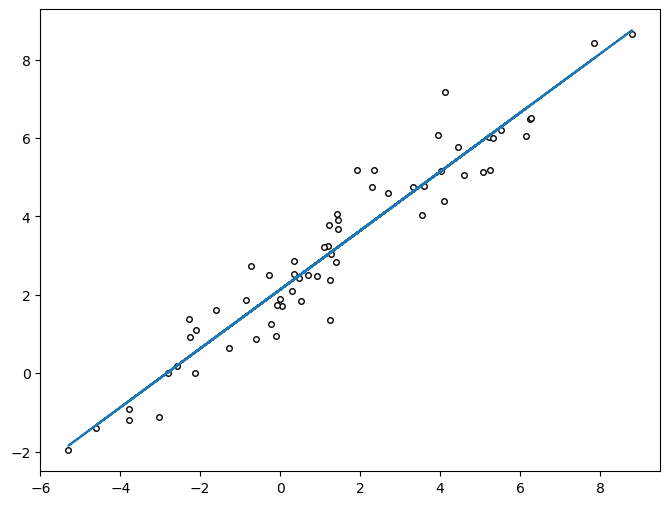

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]))
plt.show()

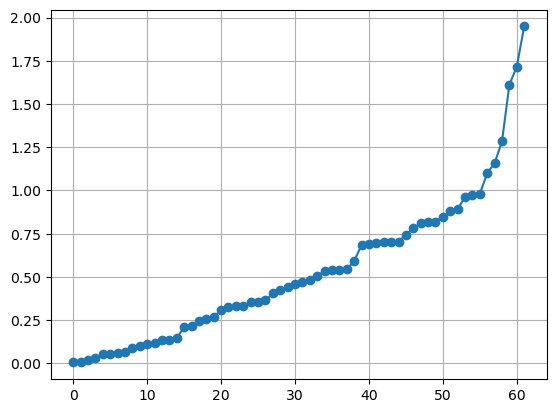

In [10]:
E = abs(mod_ls.evaluate(X[:,None]) - Y)

plt.plot(sorted(E), marker='o')
plt.grid(1)
plt.show()

In [11]:
from mltools.scores import modified_zscore

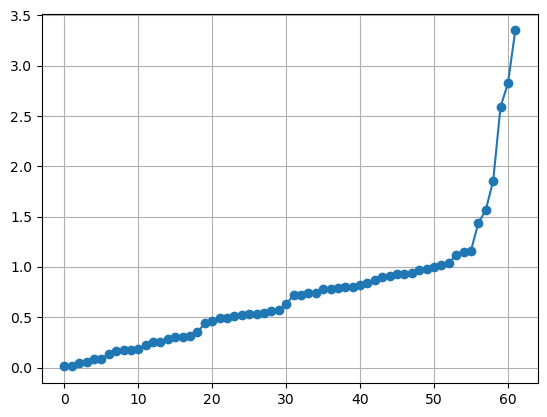

In [12]:
N = len(E)
Z = abs(modified_zscore(E))
z_ind = np.argsort(abs(Z))
Z = Z[z_ind]
plt.plot(abs(Z), marker='o')
plt.grid(1)
plt.show()

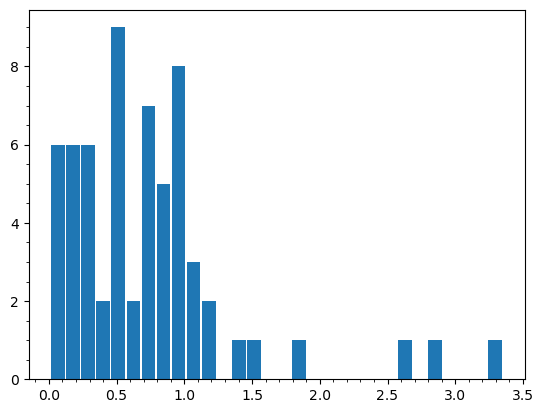

In [13]:
plt.hist(abs(Z), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

In [14]:
X1 = X[z_ind[:-3]]
Y1 = Y[z_ind[:-3]]
print(names[z_ind[:-3]])

['Guinea pig' 'Genet' 'Tree shrew' 'Raccoon' 'Big brown bat' 'Roe deer'
 'Asian elephant' 'Rat' 'Jaguar' 'Golden hamster' 'Mole rat' 'Chinchilla'
 'Yellow-bellied marmot' 'Horse' 'Rock hyrax-a' 'Arctic ground squirrel'
 'Rabbit' 'Giraffe' 'Grey seal' 'Mountain beaver' 'Echidna'
 'African giant pouched rat' 'Galago' 'N.A. opossum'
 'Nine-banded armadillo' 'European hedgehog' 'Red fox' 'Cow' 'Mouse' 'Cat'
 'Arctic fox' 'Kangaroo' 'Tree hyrax' 'Slow loris' 'Gorilla'
 'Desert hedgehog' 'Lesser short-tailed shrew' 'Goat' 'Giant armadillo'
 'Brazilian tapir' 'African elephant' 'Okapi' 'Verbet' 'Phalanger'
 'Little brown bat' 'Rock hyrax-b' 'Grey wolf' 'Patas monkey' 'Pig'
 'Donkey' 'Star-nosed mole' 'Sheep' 'E. American mole' 'Musk shrew'
 'Ground squirrel' 'Chimpanzee' 'Tenrec' 'Owl monkey' 'Baboon']


In [15]:
def fit_model(X, Y):
    rg = LinearLS()
    rg.fit(X, Y)
    return rg.model
    
mod_ls1 = fit_model(X1[:,None], Y1)
print(np.asarray(mod_ls1.param))

[2.117984   0.74040756]


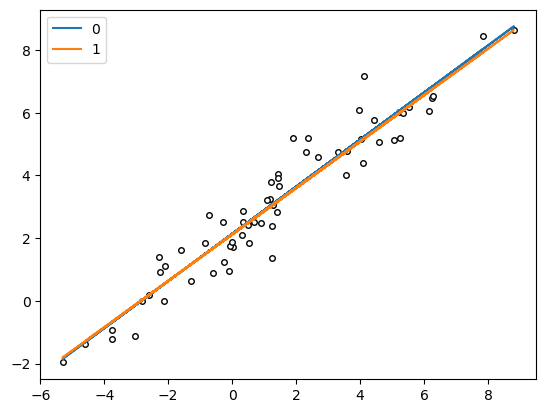

In [16]:
# plt.figure(figsize=(5,4))
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot(X, mod_ls.evaluate(X[:,None]), label='0')
plt.plot(X, mod_ls1.evaluate(X[:,None]), label='1')
plt.legend()
plt.show()

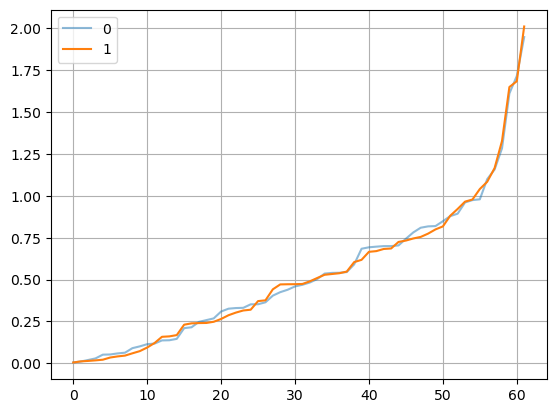

In [17]:
E1 = Y - mod_ls1.evaluate(X[:,None])

plt.plot(sorted(abs(E)), label='0', alpha=0.5)
plt.plot(sorted(abs(E1)), label='1')
plt.grid(1)
plt.legend()
plt.show()

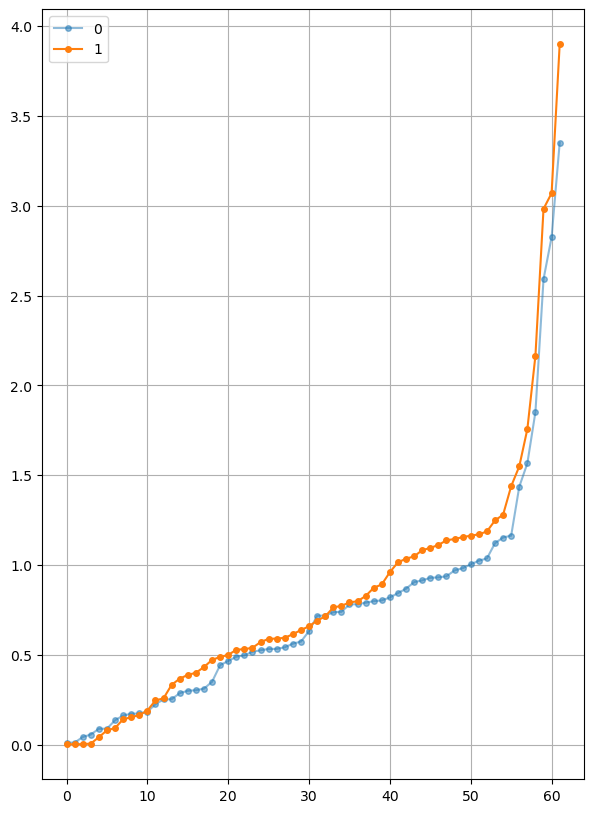

In [18]:
plt.figure(figsize=(7, 10))
Z1 = abs(modified_zscore(abs(E1)))
z1_ind = np.argsort(Z1)
Z1 = Z1[z1_ind]
plt.plot(Z, marker='o', markersize=4, label='0', alpha=0.5)
plt.plot(Z1, marker='o', markersize=4,  label='1')
# for i in range(-1, -8, -1):
#     plt.text(N-i, Z1[i], names[i])

plt.grid(1)
plt.legend()
plt.show()

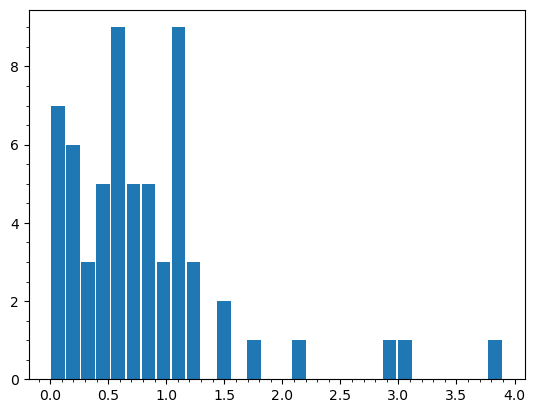

In [19]:
plt.hist(Z1, bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()